In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_val_score, ShuffleSplit
import graphviz

In [132]:
# Read data
PassDf = pd.read_csv('train.csv') # passenger dataframe
PassDf.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [133]:
PassDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and Cabin are missing values

In [134]:
# Ensure Passenger IDs are not duplicated
PassDf['PassengerId'].is_unique

True

In [135]:
# Set new index as Passenger ID
PassDf.set_index('PassengerId', inplace=True)
PassDf

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [136]:
# Replace 'Sex' column with one-hot variables
PassDf = PassDf.join(pd.get_dummies(PassDf['Sex']))
PassDf.drop(columns='Sex', inplace=True)
PassDf

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0


In [138]:
# Drop irrelevant label
PassDf.rename(columns={'female':'IsFemale'}, inplace=True)
PassDf.drop(columns=['male'], inplace=True)

In [139]:
# Get numeric columns
PassDf_num = PassDf.select_dtypes(include=np.number)
PassDf_num

,Survived,Pclass,Age,SibSp,Parch,Fare,IsFemale
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,1,3,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1
5,0,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0
888,1,1,19.0,0,0,30.0000,1
889,0,3,NaN,1,2,23.4500,1


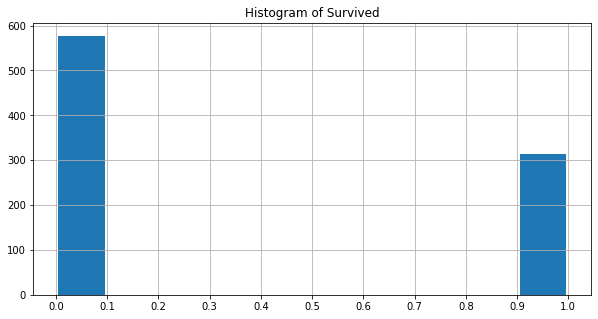

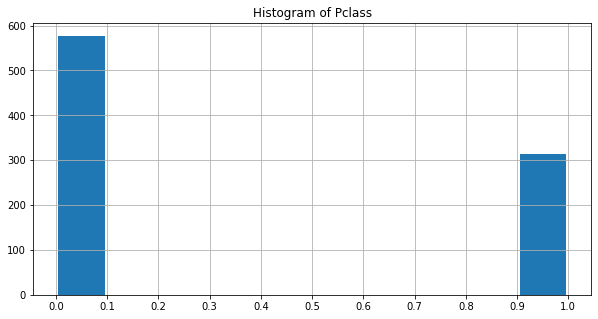

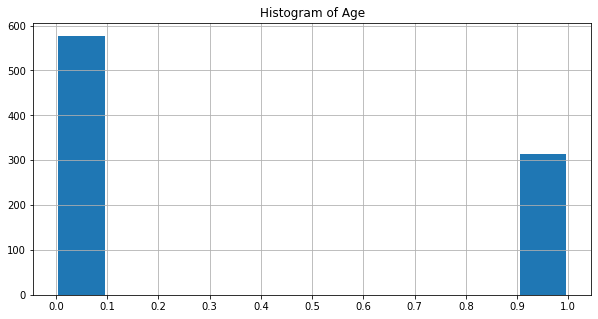

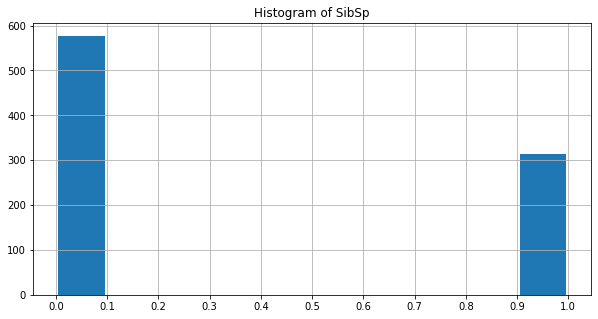

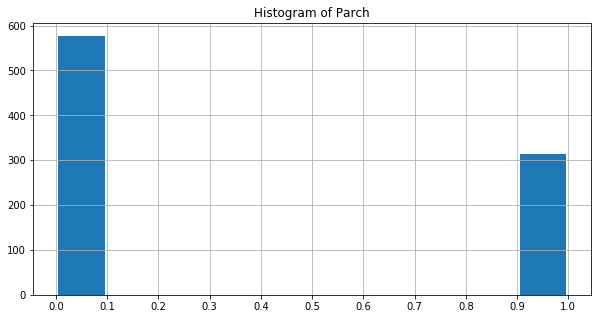

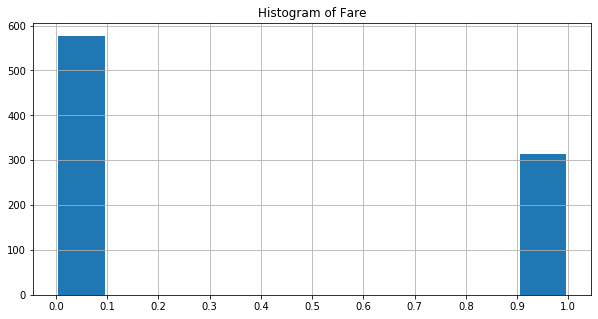

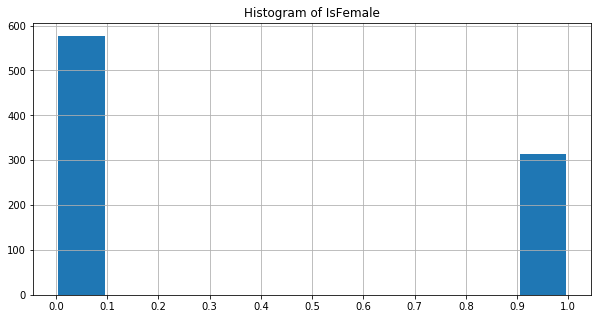

In [140]:
# Plot distributions of numeric variables
for Column in PassDf_num:
    fig, ax = plt.subplots(1,1,figsize=(10,5))
    hist, bins, patches = ax.hist(PassDf_num[column], align='mid', rwidth=0.9)
    ax.set_xticks(bins)
    ax.set_title('Histogram of ' + Column)
    ax.grid()
    plt.show()

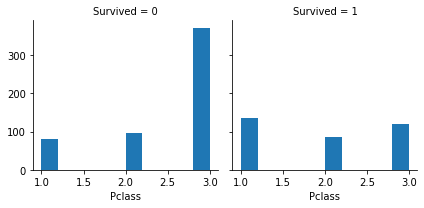

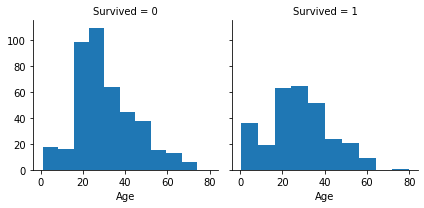

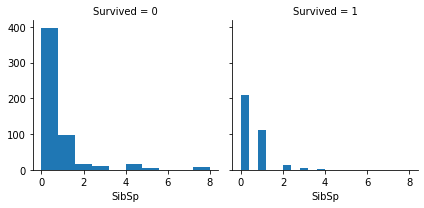

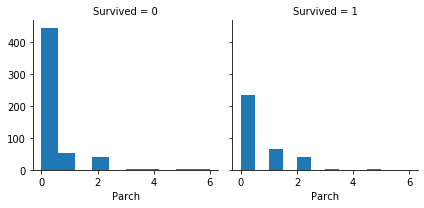

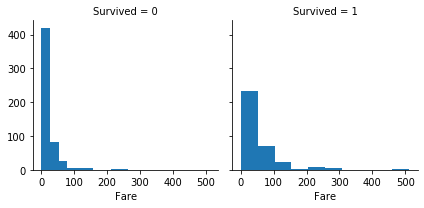

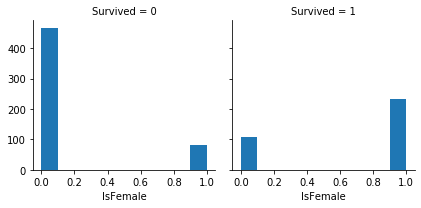

In [141]:
# Plot separate histograms for survivors and fatalities
for Feature in PassDf_num.drop(columns='Survived').columns:
    FacetGrid = sns.FacetGrid(PassDf_num, col='Survived')
    FacetGrid.map(plt.hist, Feature)

C:\Users\tanth\Anaconda3\envs\maclearning\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tanth\Anaconda3\envs\maclearning\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


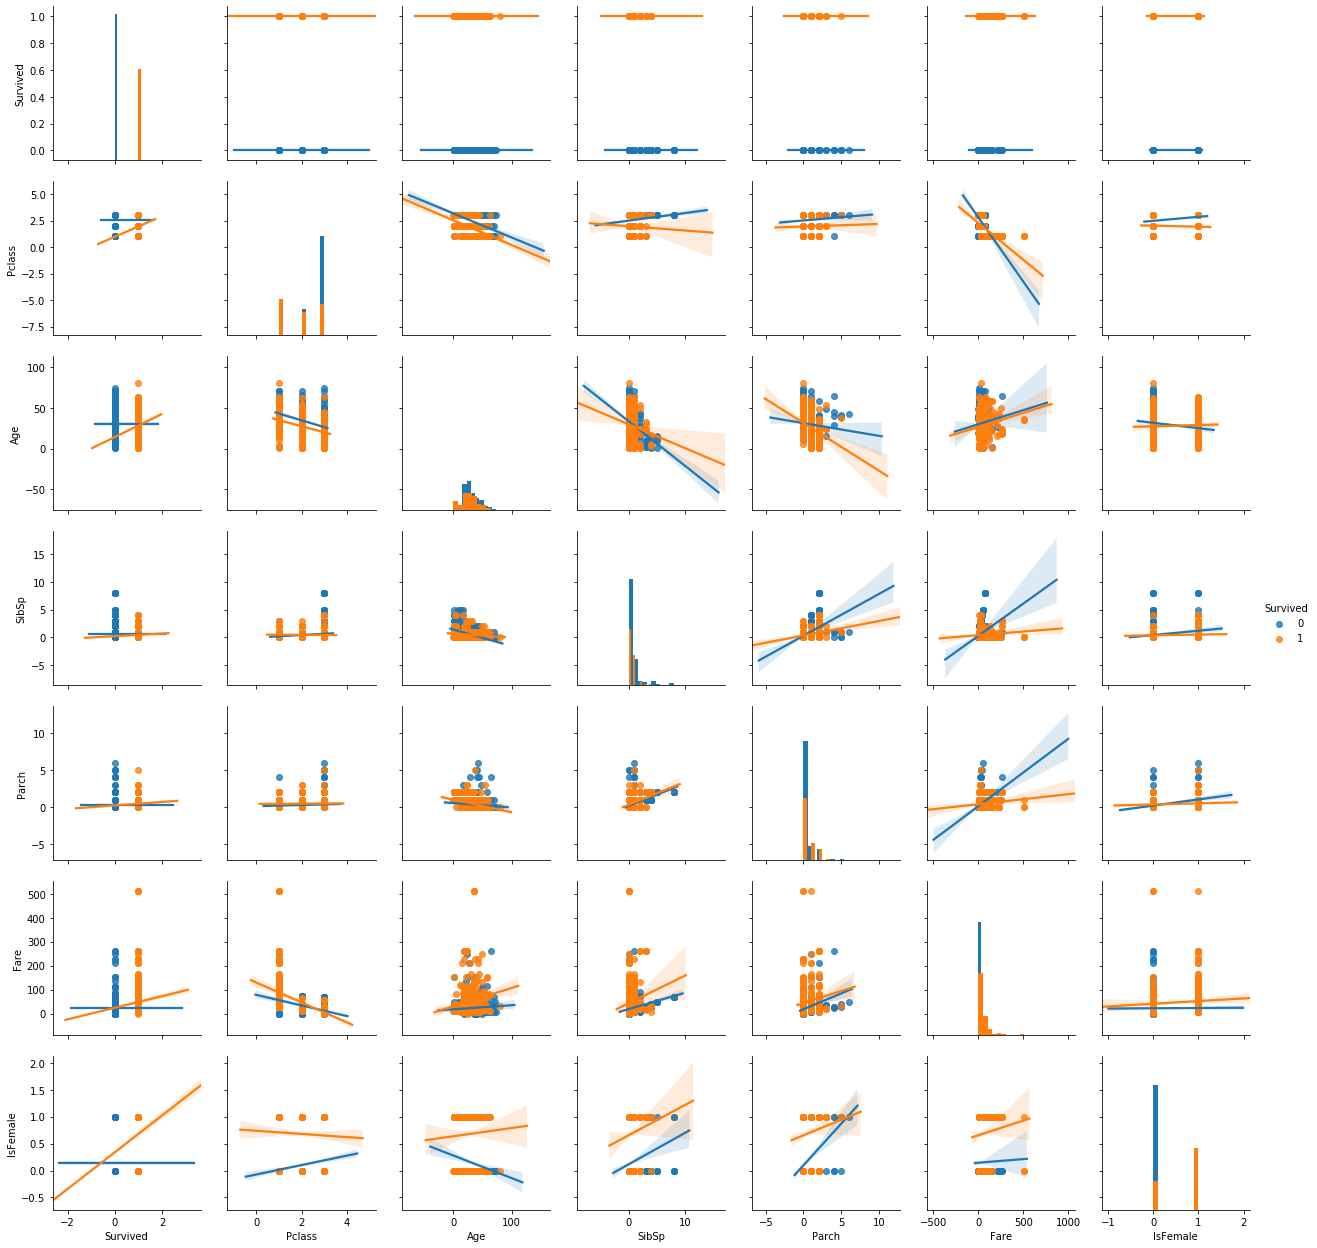

In [142]:
# Pairwise plot
PairPlot = sns.pairplot(PassDf_num, hue='Survived', kind='reg', diag_kind='hist')

In [124]:
# Split data into training and validation
from sklearn.model_selection import train_test_split
Features = pass_df_num.drop(columns=['Survived'])
Label = pass_df_num[['Survived']]
TrainFeat, TestFeat, TrainLabel, TestLabel = train_test_split(Features, Label, test_size=0.2, random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Standardise appropriate columns
Standardiser = StandardScaler(copy=True, with_mean=True, with_std=True)
StdFeatures = ['Age', "Fare"]
ColStandardiser = ColumnTransformer([('Standardiser', Standardiser, StdFeatures)], remainder='passthrough')
ColStandardiser.fit(TrainFeat)

# Fill missing age values
Imputer = SimpleImputer(strategy='mean')
Imputer.fit(TrainFeat)
PrepPipeline = Pipeline([('ColStandardiser', ColStandardiser), ('Imputer', Imputer)])

In [157]:
# Standardise appropriate columns
Standardiser = StandardScaler(copy=True, with_mean=True, with_std=True)
StdFeatures = ['Age','Fare']
PassDf_num_n = PassDf_num.copy()
PassDf_num_n.loc[:,StdFeatures] = Standardiser.fit_transform(PassDf_num[StdFeatures])

# Fill missing age values
PassDf_num_n.fillna(value={'Age' : PassDf_num_n['Age'].mean()}, inplace=True)
PassDf_num_n

,Survived,Pclass,Age,SibSp,Parch,Fare,IsFemale
PassengerId,,,,,,,
1,0,3,-5.303766e-01,1,0,-0.502445,0
2,1,1,5.718310e-01,1,0,0.786845,1
3,1,3,-2.548247e-01,0,0,-0.488854,1
4,1,1,3.651671e-01,1,0,0.420730,1
5,0,3,3.651671e-01,0,0,-0.486337,0
...,...,...,...,...,...,...,...
887,0,2,-1.859368e-01,0,0,-0.386671,0
888,1,1,-7.370406e-01,0,0,-0.044381,1
889,0,3,2.388379e-16,1,2,-0.176263,1


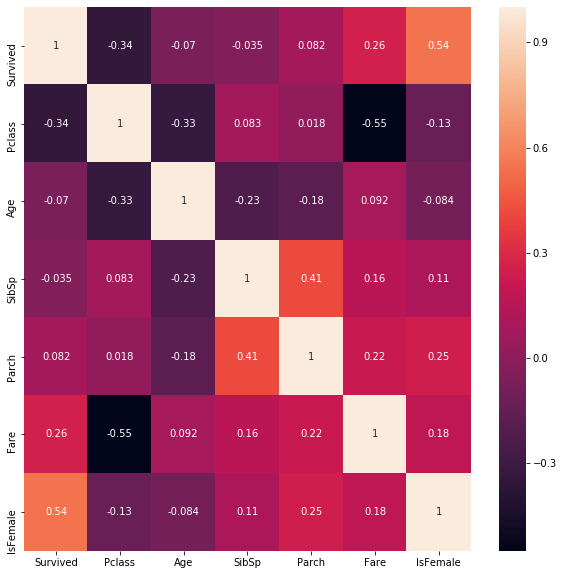

Survived    1.000000
IsFemale    0.543351
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.069809
SibSp       0.035322
Name: Survived, dtype: float64

In [158]:
# Check correlation matrix
FeatCorr = PassDf_num_n.corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(FeatCorr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Peek most correlated variables
FeatCorr['Survived'].abs().sort_values(ascending=False)

Explained variances:  [0.69644963 0.19012962 0.11342075]
Components:  [[ 0.09072637 -0.5833826   0.80711428]
 [ 0.0566154   0.81216742  0.58067097]
 [-0.99426527 -0.00698707  0.10671344]]


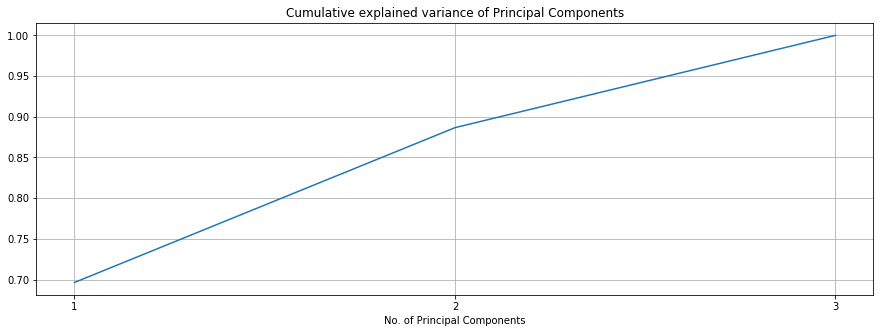

In [159]:
# Perform PCA
from sklearn.decomposition import PCA
PCA_Model = PCA(n_components=3)

# Fit on most correlated features
PCA_Feat = ['IsFemale','Pclass','Fare']
PCA_Model.fit(PassDf_num_n.loc[:,PCA_Feat])
print('Explained variances: ', PCA_Model.explained_variance_ratio_)
print('Components: ', PCA_Model.components_)

# Cumulative explained variance
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
xticks = range(1,len(PCA_Model.explained_variance_ratio_) + 1)
ax.plot(xticks, np.cumsum(PCA_Model.explained_variance_ratio_))
ax.set_xticks(xticks)
ax.grid()
ax.set_title('Cumulative explained variance of Principal Components')
ax.set_xlabel('No. of Principal Components')
plt.show()

In [160]:
# Transform data into Principal Components
PassDf_PC = pd.DataFrame(PCA_Model.transform(PassDf_num_n.loc[:,PCA_Feat]))
PassDf_PC.set_index(pass_df.index, inplace=True)
PassDf_PC.rename(columns=lambda x: 'PC' + str(int(x)+1), inplace=True)
PassDf_PC

,PC1,PC2,PC3
PassengerId,,,
1,-0.840830,0.249791,0.291944
2,1.457266,-0.569275,-0.550763
3,-0.739134,0.314298,-0.700871
4,1.161770,-0.781867,-0.589832
5,-0.827829,0.259144,0.293663
...,...,...,...
887,-0.164004,-0.495149,0.311286
888,0.786372,-1.051944,-0.639466
889,-0.486838,0.495811,-0.667513


In [161]:
# Join PCs with main dataframe
PassDf_PC = PassDf_num_n.join(PassDf_PC)
PassDf_PC

,Survived,Pclass,Age,SibSp,Parch,Fare,IsFemale,PC1,PC2,PC3
PassengerId,,,,,,,,,,
1,0,3,-5.303766e-01,1,0,-0.502445,0,-0.840830,0.249791,0.291944
2,1,1,5.718310e-01,1,0,0.786845,1,1.457266,-0.569275,-0.550763
3,1,3,-2.548247e-01,0,0,-0.488854,1,-0.739134,0.314298,-0.700871
4,1,1,3.651671e-01,1,0,0.420730,1,1.161770,-0.781867,-0.589832
5,0,3,3.651671e-01,0,0,-0.486337,0,-0.827829,0.259144,0.293663
...,...,...,...,...,...,...,...,...,...,...
887,0,2,-1.859368e-01,0,0,-0.386671,0,-0.164004,-0.495149,0.311286
888,1,1,-7.370406e-01,0,0,-0.044381,1,0.786372,-1.051944,-0.639466
889,0,3,2.388379e-16,1,2,-0.176263,1,-0.486838,0.495811,-0.667513


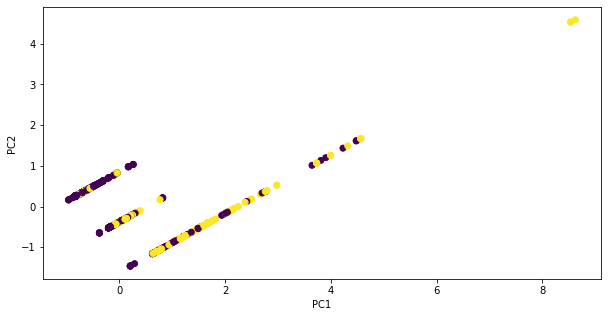

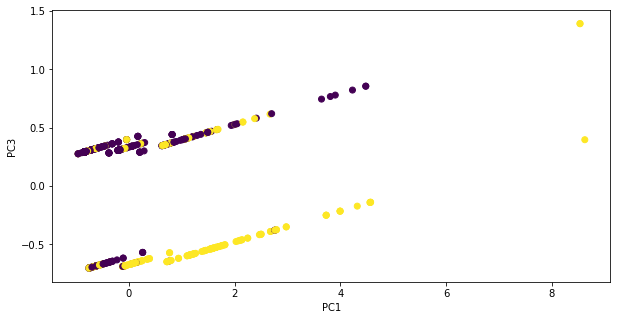

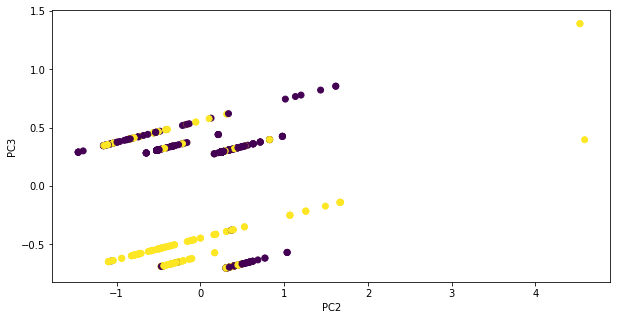

In [162]:
# Plot PC components
cmap = cm.viridis(np.linspace(0,1,2))

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.scatter(PassDf_PC['PC1'], PassDf_PC['PC2'], c=cmap[PassDf_PC['Survived']])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.scatter(PassDf_PC['PC1'], PassDf_PC['PC3'], c=cmap[PassDf_PC['Survived']])
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')
plt.show()
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.scatter(PassDf_PC['PC2'], PassDf_PC['PC3'], c=cmap[PassDf_PC['Survived']])
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
plt.show()

In [193]:
# Split data into training and validation
from sklearn.model_selection import train_test_split
Features = PassDf_num_n.drop(columns=['Survived'])
Label = PassDf_num_n[['Survived']]
TrainFeat, TestFeat, TrainLabel, TestLabel = train_test_split(Features, Label, test_size=0.2, random_state=42)

In [194]:
# Add PCs to training features
TrainPCs = pd.DataFrame(PCA_Model.transform(TrainFeat.loc[:, PCA_features]))
TrainPCs.set_index(TrainFeat.index, inplace=True)
TrainPCs.rename(columns=lambda x: 'PC' + str(int(x)+1), inplace=True)
TrainFeat = TrainFeat.join(TrainPCs)
TrainFeat

,Pclass,Age,SibSp,Parch,Fare,IsFemale,PC1,PC2,PC3
PassengerId,,,,,,,,,
332,1,1.088491e+00,0,0,-0.074583,0,0.671269,-1.126097,0.351577
734,2,-4.614887e-01,0,0,-0.386671,0,-0.164004,-0.495149,0.311286
383,3,1.585031e-01,0,0,-0.488854,0,-0.829861,0.257683,0.293394
705,3,-2.548247e-01,1,0,-0.490280,0,-0.831011,0.256855,0.293242
814,3,-1.632584e+00,4,2,-0.018709,1,-0.359674,0.587298,-0.650700
...,...,...,...,...,...,...,...,...,...
107,3,-5.992646e-01,0,0,-0.494391,1,-0.743603,0.311083,-0.701462
271,1,2.388379e-16,0,0,-0.024246,0,0.711896,-1.096868,0.356948
861,3,7.784949e-01,2,0,-0.364355,0,-0.729376,0.329976,0.306680


In [168]:
TrainFeat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 332 to 103
Data columns (total 9 columns):
Pclass      712 non-null int64
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
IsFemale    712 non-null uint8
PC1         712 non-null float64
PC2         712 non-null float64
PC3         712 non-null float64
dtypes: float64(5), int64(3), uint8(1)
memory usage: 70.8 KB


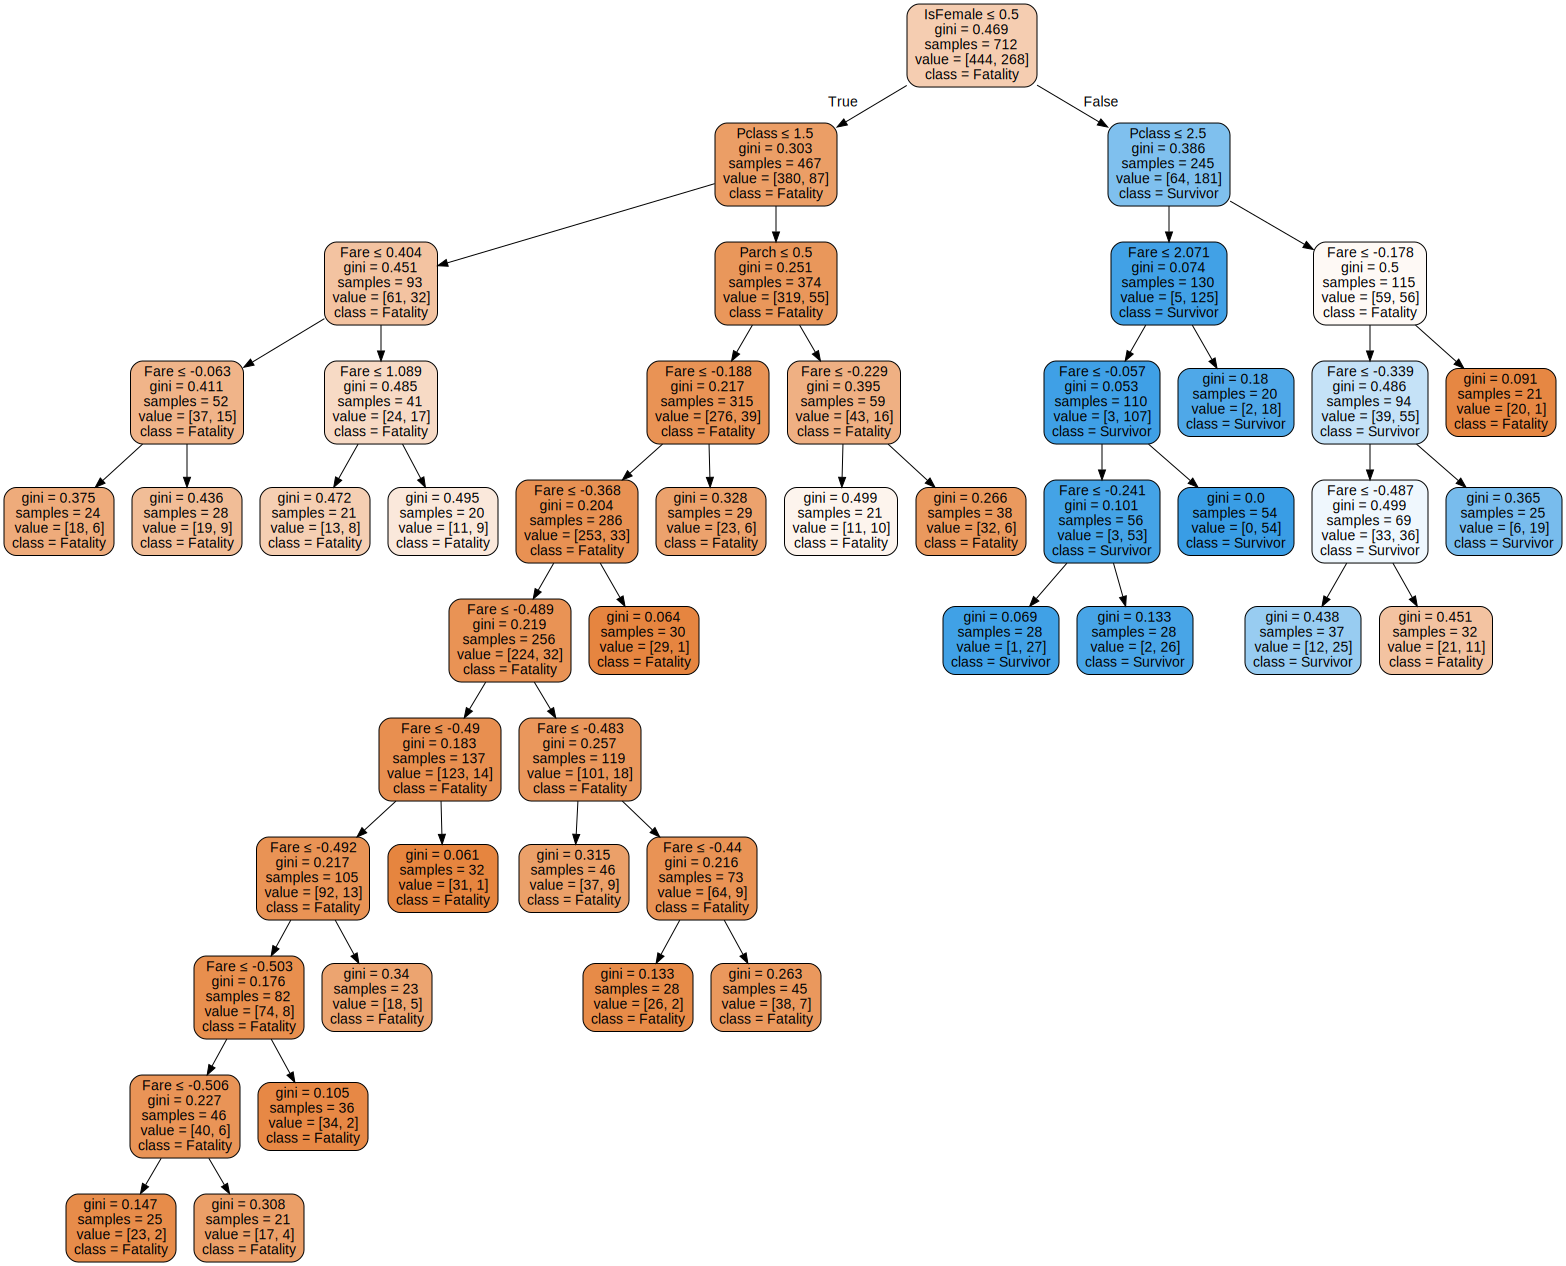

In [169]:
# Try a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(max_depth=None, min_samples_leaf=20)
Features = ['IsFemale', 'Pclass', 'Fare', 'Parch']
DTree.fit(TrainFeat.loc[:, Features], TrainLabel)
dot_data = sklearn.tree.export_graphviz(DTree, out_file=None, 
                      feature_names=Features,  
                      class_names=['Fatality','Survivor'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [178]:
def PredictionResults(Model, TrainFeatures, TrainLabel, TestFeatures, TestLabel):
    # Check decision tree accuracy on training set
    TestPredict = Model.predict(TrainFeatures)
    TestCompare = TestPredict == TrainLabel['Survived']
    Accuracy =  TestCompare.sum()/TestCompare.size
    print('Decision tree accuracy on training: ', Accuracy)

    # Check decision tree accuracy on test set
    TestPredict = Model.predict(TestFeatures)
    TestCompare = TestPredict == TestLabel['Survived']
    Accuracy =  TestCompare.sum()/TestCompare.size
    print('Decision tree accuracy on test: ', Accuracy)

    # Plot confusion matrix
    Confusion = sklearn.metrics.confusion_matrix(TestLabel, TestPredict)
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    sns.heatmap(Confusion, annot=True, ax=ax[0])
    bottom, top = ax[0].get_ylim()
    ax[0].set_ylim(bottom + 0.5, top - 0.5)
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    
    # Normalised confusion matrix
    Confusion_n = Confusion/Confusion.sum(axis=1)[:,np.newaxis]
    sns.heatmap(Confusion_n, annot=True, ax=ax[1])
    bottom, top = ax[1].get_ylim()
    ax[1].set_ylim(bottom + 0.5, top - 0.5)
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')
    plt.show()

Decision tree accuracy on training:  0.8286516853932584
Decision tree accuracy on test:  0.7932960893854749


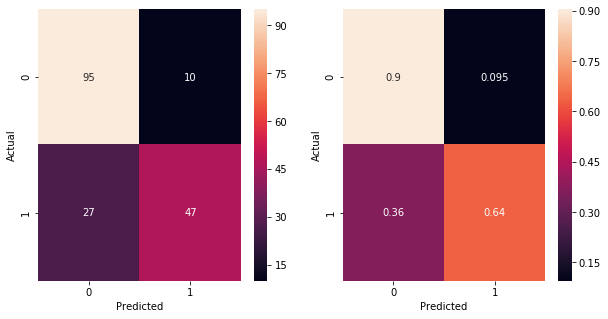

In [179]:
PredictionResults(DTree, TrainFeat[Features], TrainLabel, TestFeat[Features], TestLabel)

Let's try adding Principal Components as features

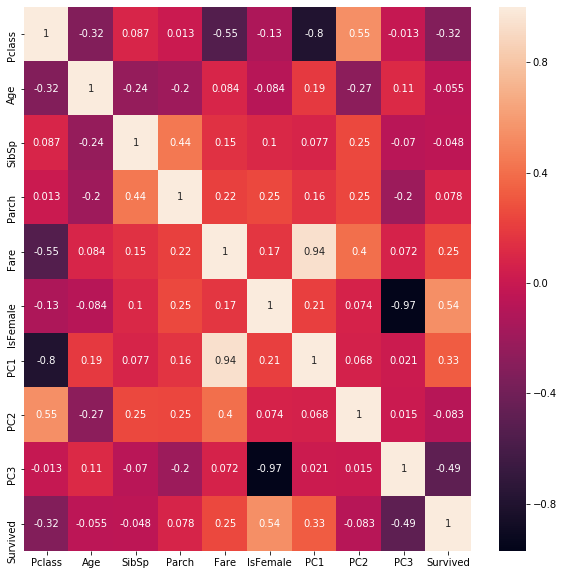

Survived    1.000000
IsFemale    0.541750
PC3         0.485707
PC1         0.325598
Pclass      0.321750
Fare        0.246641
PC2         0.083406
Parch       0.078311
Age         0.054971
SibSp       0.047602
Name: Survived, dtype: float64

In [180]:
# Check correlation matrix
FeatCorr = TrainFeat.join(TrainLabel).corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(FeatCorr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Peek most correlated variables
FeatCorr['Survived'].abs().sort_values(ascending=False)

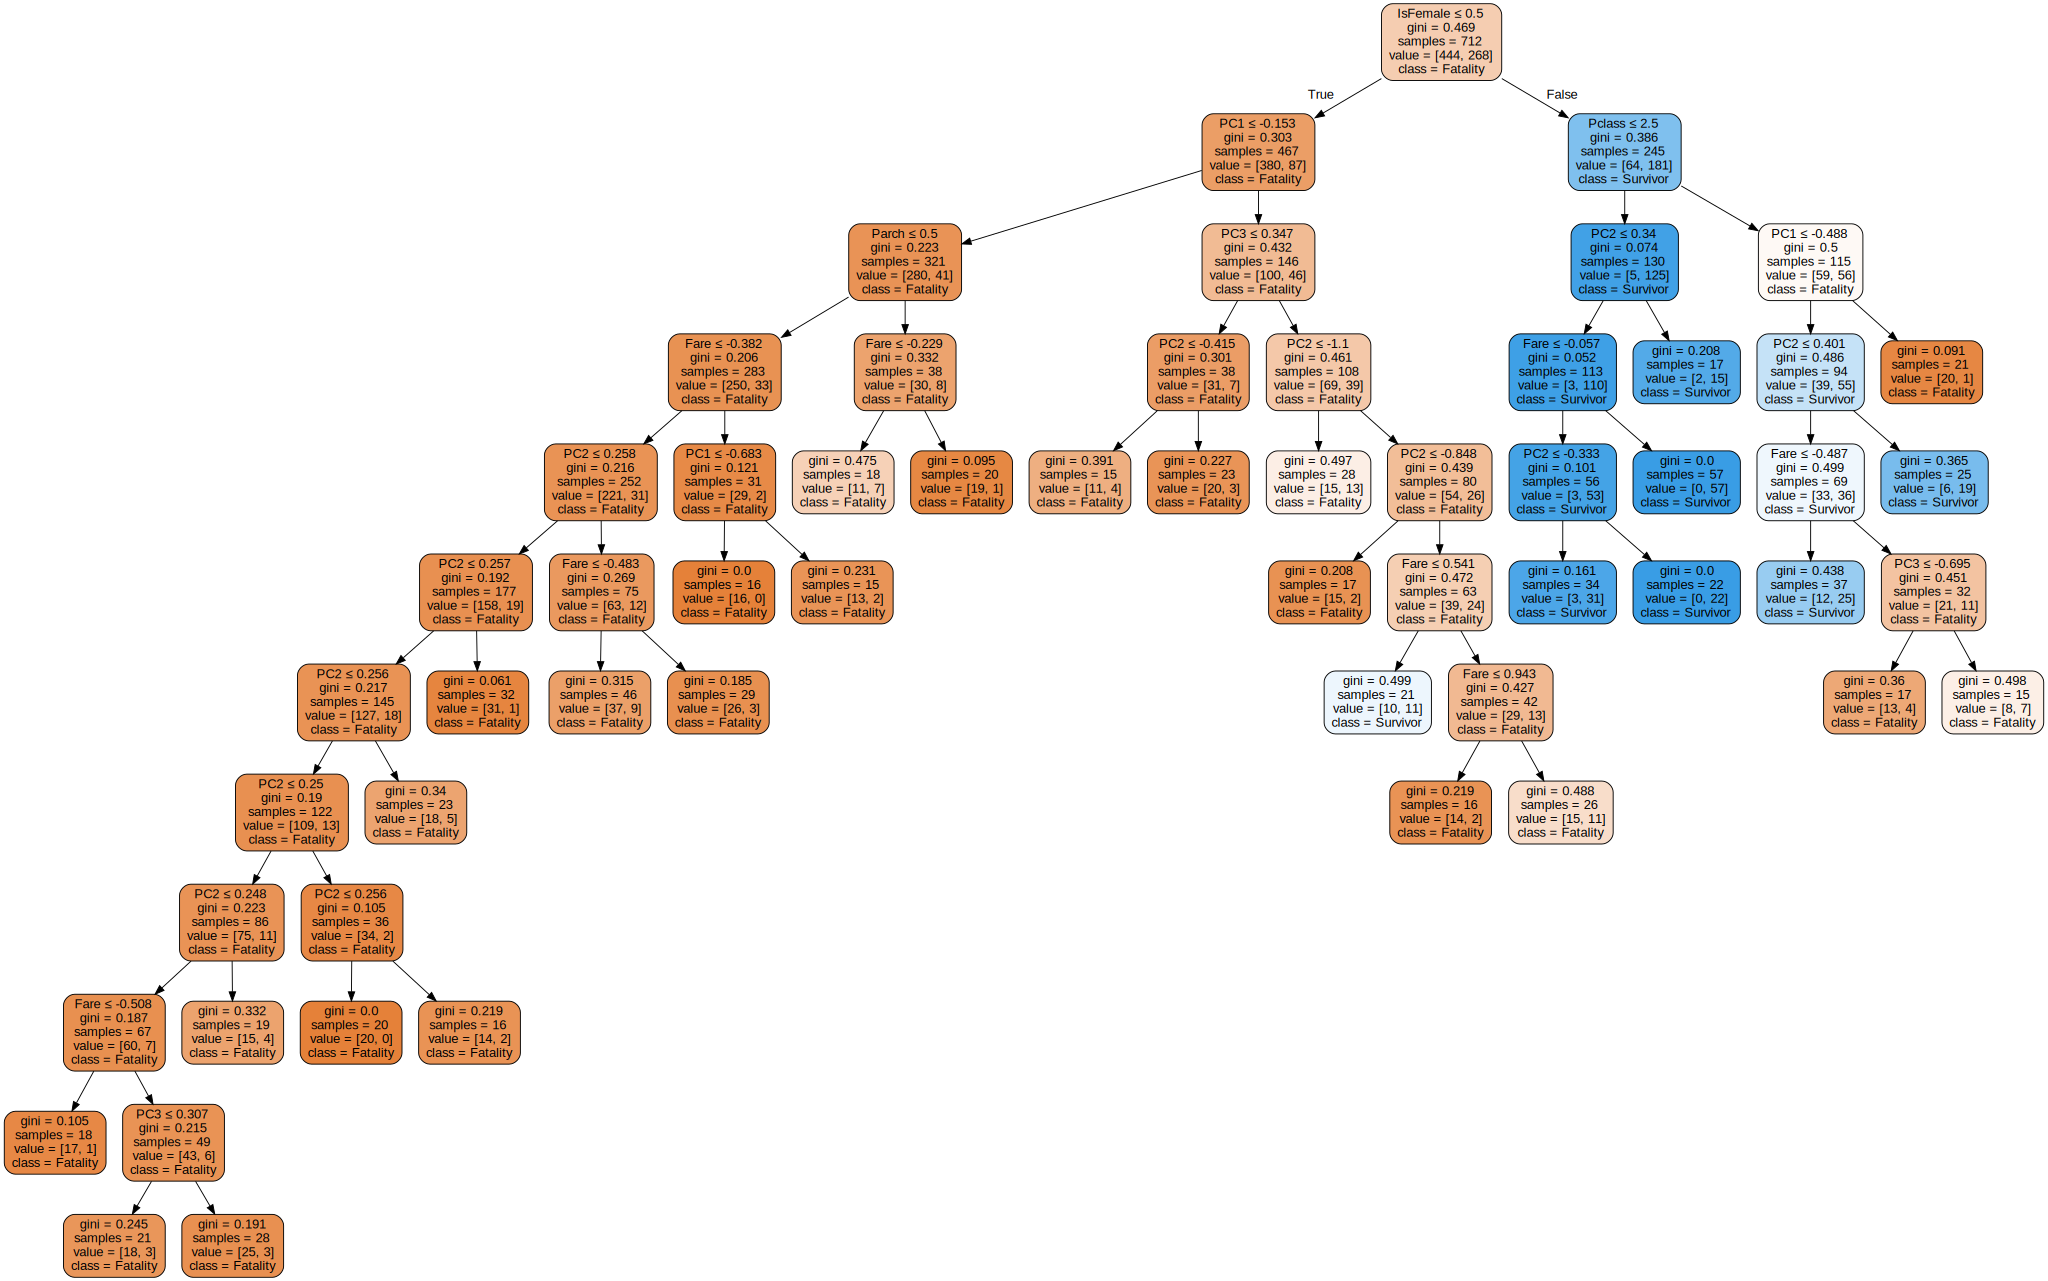

In [182]:
# Try decision tree with Principal Components
DTree_PCA = sklearn.tree.DecisionTreeClassifier(max_depth=None, min_samples_leaf=15)
Features_PCA = ['IsFemale', 'Pclass', 'Fare', 'Parch', 'PC3','PC1','PC2']
DTree_PCA.fit(TrainFeat[Features_PCA], TrainLabel)
dot_data = sklearn.tree.export_graphviz(DTree_PCA, out_file=None, 
                      feature_names=Features_PCA,  
                      class_names=['Fatality','Survivor'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Decision tree accuracy on training:  0.8300561797752809
Decision tree accuracy on test:  0.8044692737430168


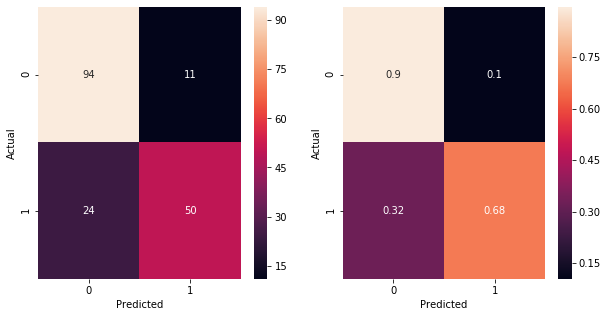

In [195]:
# Add PCs to test set
TestPCs = pd.DataFrame(PCA_Model.transform(TestFeat.loc[:, PCA_Feat]))
TestPCs.set_index(TestFeat.index, inplace=True)
TestPCs.rename(columns=lambda x: 'PC' + str(int(x)+1), inplace=True)
TestFeat = TestFeat.join(TestPCs)

PredictionResults(DTree_PCA, TrainFeat[Features_PCA], TrainLabel, TestFeat[Features_PCA], TestLabel)

In [203]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes': [None] + list(range(10,50)), 'min_samples_leaf':list(range(1,10))}
DTree_PCA_grid = GridSearchCV(DTree_PCA, param_grid, cv=5).fit(TrainFeat[Features_PCA], TrainLabel)
DTree_PCA_grid.best_params_

{'max_leaf_nodes': 44, 'min_samples_leaf': 1}

Decision tree accuracy on training:  0.8820224719101124
Decision tree accuracy on test:  0.8212290502793296


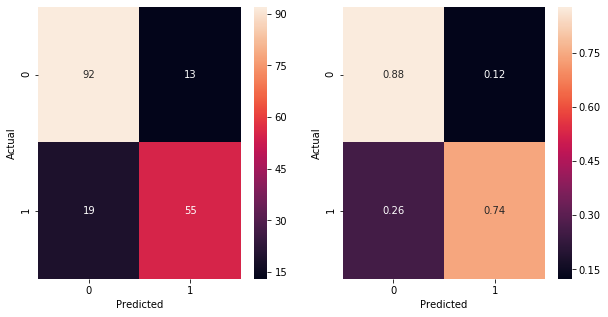

In [204]:
PredictionResults(DTree_PCA_grid, TrainFeat[Features_PCA], TrainLabel, TestFeat[Features_PCA], TestLabel)

Try Random Forest Classifiers

In [264]:
from sklearn.ensemble import RandomForestClassifier
RF_PCA = RandomForestClassifier(n_estimators=43, max_leaf_nodes=83, min_samples_leaf=1, max_depth=None)
RF_PCA.fit(TrainFeat[Features_PCA], TrainLabel['Survived'].ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=83,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=43,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Decision tree accuracy on training:  0.9171348314606742
Decision tree accuracy on test:  0.8212290502793296


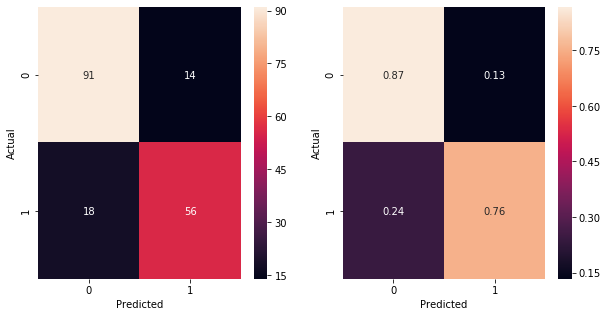

In [265]:
PredictionResults(RF_PCA, TrainFeat[Features_PCA], TrainLabel, TestFeat[Features_PCA], TestLabel)

In [263]:
param_grid = {'n_estimators':list(range(50,100)),
              'max_leaf_nodes': [None] + list(range(40,50)),
              'min_samples_leaf':list(range(1,10)),
             }
RF_PCA_grid = GridSearchCV(RF_PCA, param_grid, cv=5, verbose=True, n_jobs=10).fit(TrainFeat[Features_PCA], TrainLabel['Survived'])
RF_PCA_grid.best_params_

Fitting 5 folds for each of 4950 candidates, totalling 24750 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   16.7s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   27.2s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:   40.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:   55.0s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed:  3.5min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed:  4.1min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed:  4.7min
[Parallel(n_jobs=10)]: Done 11230 tasks      

{'max_leaf_nodes': 43, 'min_samples_leaf': 1, 'n_estimators': 83}

In [266]:
RF_PCA_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=43,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=83,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Decision tree accuracy on training:  0.8904494382022472
Decision tree accuracy on test:  0.8156424581005587


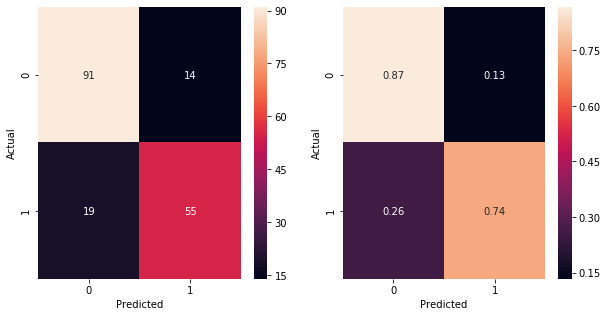

In [270]:
PredictionResults(RF_PCA_grid, TrainFeat[Features_PCA], TrainLabel, TestFeat[Features_PCA], TestLabel)

In [48]:
pass_df_num.iloc[:,1:]

,Pclass,Age,SibSp,Parch,Fare,female,male
PassengerId,,,,,,,
1,3,22.0,1,0,7.2500,0,1
2,1,38.0,1,0,71.2833,1,0
3,3,26.0,0,0,7.9250,1,0
4,1,35.0,1,0,53.1000,1,0
5,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1
888,1,19.0,0,0,30.0000,1,0
889,3,NaN,1,2,23.4500,1,0


In [7]:
# Get survivors and fatalitites
surv = pass_df[pass_df['Survived'] == 1] # Survivors
fata = pass_df[pass_df['Survived'] == 0] # Fatalities

In [8]:
# Peek cabin information
pass_df[~pass_df['Cabin'].isnull()].loc[:,['Survived','Cabin']]

,Survived,Cabin
PassengerId,,
2,1,C85
4,1,C123
7,0,E46
11,1,G6
12,1,C103
...,...,...
872,1,D35
873,0,B51 B53 B55
880,1,C50
